# Financial Statements Fraud Detection

## Project Overview

## Problem Statement

<a id="contents"></a>
## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading the Data</a>

<a href=#three>3. Exploratory Data Analysis</a>

<a href=#four>4. Feature Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanation</a>

<a href=#eight>8. Conclusion</a>

<a href=#nine>9. References</a>

<a id="one"></a>
## 1. Importing Packages
<a href=#contents>Back to Table of Contents</a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import re
pd.set_option('display.max_rows', 999)
pd.set_option('display.max_columns', 999)
pd.set_option('display.width', 999)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
import plotly.io as pio
pio.renderers.default='notebook'

<a id="two"></a>
## 2. Loading the Data
<a href=#contents>Back to Table of Contents</a>

In [3]:
df =  pd.read_csv('https://raw.githubusercontent.com/Explore-AI/internship-project-2207-05/main/dataset/financials_data.csv?token=GHSAT0AAAAAAB3ENCPSE5VOIGTJVNOOY3DUZBFYFUQ')

In [4]:
df.head()

,DimFacilityKey,PricingFinancialsID,Financial_Type,Industry,Country,FinancialsDate,PricingFinancialsRevenue,PricingFinancialsCostOfSales,PricingFinancialsGrossProfit,PricingFinancialsOperatingExpensesOverheads,PricingFinancialsOtherGainsOrLosses,PricingFinancialsEBITDA,PricingFinancialsDepreciation,PricingFinancialsTotalFairValueAdjustments,PricingFinancialsEBIT,PricingFinancialsExceptionalItems,PricingFinancialsFinanceIncome,PricingFinancialsOtherBeforeEBIT,PricingFinancialsFinanceCost,PricingFinancialsForeignExchange,PricingFinancialsNetProfitBeforeTax,PricingFinancialsTax,PricingFinancialsNetProfitAfterTax,PricingFinancialsIncomeFromEquityAccountedInvestments,PricingFinancialsDiscontinuedOperations,PricingFinancialsTotalCostBase,PricingFinancialsAmortisation,PricingFinancialsDepreciationAmortisationTotal,PricingFinancialsImpairmentsOfTangibleAssets,PricingFinancialsEBITBeforeFairValueAdjustments,PricingFinancialsImpairmentOfGoodwill,PricingFinancialsShareOfProfitInAssociatesAndJVs,PricingFinancialsOtherAfterEBIT,PricingFinancialsNCA_PropertyPlantEquipment,PricingFinancialsNCA_Goodwill,PricingFinancialsNCA_OtherIntangibles,PricingFinancialsNCA_OtherNonCurrentAssets,PricingFinancialsNCA_TotalNonCurrentAssets,PricingFinancialsNCA_AvailableForSaleInvestments,PricingFinancialsNCA_OtherInterestBearingLoans,PricingFinancialsNCA_OtherNonInterestBearingLoans,PricingFinancialsNCA_CededAssets,PricingFinancialsNCA_UnfavourableAssets,PricingFinancialsNCA_TotalLoansIssued,PricingFinancialsNCA_InvestmentPropertyAndPropertyDevelopments,PricingFinancialsNCA_GoodwillAndOtherIntangibles,PricingFinancialsNCA_InvestmentsInAssociatesAndJVs,PricingFinancialsNCA_LongTermReceivables,PricingFinancialsNCA_InvestmentsInServiceConcessions,PricingFinancialsNCA_FinancialAssetsAtFairValueThroughProfitAndLoss,PricingFinancialsNCA_DeferredTaxAssets,PricingFinancialsNCA_DerivativeFinancialInstruments,PricingFinancialsNCA_AmountsDueFromContractCustomers,PricingFinancialsCA_Inventories,PricingFinancialsCA_CashAndCashEquivalents,PricingFinancialsCA_DerivativeFinancialInstruments,PricingFinancialsCA_TradeAndOtherReceivables,PricingFinancialsCA_InvestmentInJointEntities,PricingFinancialsCA_TotalLoansIssued,PricingFinancialsCA_CurrentTaxationAssets,PricingFinancialsCA_OtherCurrentAssets,PricingFinancialsCA_TotalCurrentAssets,PricingFinancialsTotalAssets,PricingFinancialsCA_OtherInterestBearingLoans,PricingFinancialsCA_OtherNonInterestBearingLoans,PricingFinancialsCA_CededAssets,PricingFinancialsCA_UnfavourableAssets,PricingFinancialsCA_DevelopmentLand,PricingFinancialsCA_ShortTermInvestments,PricingFinancialsCA_ContractsInProgress,PricingFinancialsNCL_DeferredTax,PricingFinancialsNCL_TotalLoansReceived,PricingFinancialsNCL_SubcontractorLiabilities,PricingFinancialsNCL_InstalmentSaleLiabilities,PricingFinancialsNCL_OtherNonCurrentLiabilities,PricingFinancialsNCL_TotalNonCurrentLiabilities,PricingFinancialsNCL_OtherLiabilities,PricingFinancialsTotalLiabilities,PricingFinancialsNCL_TotalEquityAndLiabilities,PricingFinancialsNCL_OtherInterestBearingLoans,PricingFinancialsNCL_OtherNonInterestBearingLoans,PricingFinancialsNCL_PreferenceShares,PricingFinancialsNCL_NonCurrentTradePayables,PricingFinancialsCL_TradeAndOtherPayables,PricingFinancialsCL_TaxationPayable,PricingFinancialsCL_DerivativeFinancialInstruments,PricingFinancialsCL_BankOverdraft,PricingFinancialsCL_TotalLoansReceived,PricingFinancialsCL_ProvisionsForLiabilitiesChargesObligations,PricingFinancialsCL_AmountsReceivedInAdvance,PricingFinancialsCL_AmountsDueToContractCustomers,PricingFinancialsCL_SubcontractorLiabilities,PricingFinancialsCL_InstalmentSaleLiabilities,PricingFinancialsCL_OtherCurrentLiabilities,PricingFinancialsCL_TotalCurrentLiabilities,PricingFinancialsCL_OtherInterestBearingLoans,PricingFinancialsCL_OtherNonInterestBearingLoans,PricingFinancialsCL_CurrentPortionOfInterestBearingBorrowings,PricingFinancialsCL_ContractRelatedProvisions,PricingFinancialsCL_OtherFinancialLiabilities,PricingFin

In [5]:
#cleaning column names

def clean_cols(s):
    s= str(s)
    s= re.sub('PricingFinancials',"",s) # removing the prefix "PricingFinancials"
    s = re.sub('Dim',"",s) # removing the prefix "Dim"
    return s.lower()

In [6]:
df.columns = [clean_cols(cols) for cols in df.columns]

In [7]:
df.head()

,facilitykey,id,financial_type,industry,country,financialsdate,revenue,costofsales,grossprofit,operatingexpensesoverheads,othergainsorlosses,ebitda,depreciation,totalfairvalueadjustments,ebit,exceptionalitems,financeincome,otherbeforeebit,financecost,foreignexchange,netprofitbeforetax,tax,netprofitaftertax,incomefromequityaccountedinvestments,discontinuedoperations,totalcostbase,amortisation,depreciationamortisationtotal,impairmentsoftangibleassets,ebitbeforefairvalueadjustments,impairmentofgoodwill,shareofprofitinassociatesandjvs,otherafterebit,nca_propertyplantequipment,nca_goodwill,nca_otherintangibles,nca_othernoncurrentassets,nca_totalnoncurrentassets,nca_availableforsaleinvestments,nca_otherinterestbearingloans,nca_othernoninterestbearingloans,nca_cededassets,nca_unfavourableassets,nca_totalloansissued,nca_investmentpropertyandpropertydevelopments,nca_goodwillandotherintangibles,nca_investmentsinassociatesandjvs,nca_longtermreceivables,nca_investmentsinserviceconcessions,nca_financialassetsatfairvaluethroughprofitandloss,nca_deferredtaxassets,nca_derivativefinancialinstruments,nca_amountsduefromcontractcustomers,ca_inventories,ca_cashandcashequivalents,ca_derivativefinancialinstruments,ca_tradeandotherreceivables,ca_investmentinjointentities,ca_totalloansissued,ca_currenttaxationassets,ca_othercurrentassets,ca_totalcurrentassets,totalassets,ca_otherinterestbearingloans,ca_othernoninterestbearingloans,ca_cededassets,ca_unfavourableassets,ca_developmentland,ca_shortterminvestments,ca_contractsinprogress,ncl_deferredtax,ncl_totalloansreceived,ncl_subcontractorliabilities,ncl_instalmentsaleliabilities,ncl_othernoncurrentliabilities,ncl_totalnoncurrentliabilities,ncl_otherliabilities,totalliabilities,ncl_totalequityandliabilities,ncl_otherinterestbearingloans,ncl_othernoninterestbearingloans,ncl_preferenceshares,ncl_noncurrenttradepayables,cl_tradeandotherpayables,cl_taxationpayable,cl_derivativefinancialinstruments,cl_bankoverdraft,cl_totalloansreceived,cl_provisionsforliabilitieschargesobligations,cl_amountsreceivedinadvance,cl_amountsduetocontractcustomers,cl_subcontractorliabilities,cl_instalmentsaleliabilities,cl_othercurrentliabilities,cl_totalcurrentliabilities,cl_otherinterestbearingloans,cl_othernoninterestbearingloans,cl_currentportionofinterestbearingborrowings,cl_contractrelatedprovisions,cl_otherfinancialliabilities,cl_assetsclassifiedforsale,statedcapitalsharecapitalandpremium,retainedearnings,othercomponentsequity,distributablereserves,totalshareholderequitybeforeminorities,noncontrollinginterests,totalequity,networth,equityportiononcompoundinstrument,convertibledebenture,nondistributablereserves,cff_inflowissuesharecapital,cff_outflowtreasuryshares,cff_dividendspaid,cff_otherinflowsfromshares,cff_otheroutflowsfromshares,cff_interestborrowingsraised,cff_interestborrowingsrepaid,cff_incdeclongtermliabilities,cff_netintegrouploans,cff_netserviceconcessions,cff_instalmentscapitalisedleases,cff_postretirementbenefitspaid,cff_otherinflowsdebt,cff_otheroutflowsdebt,cff_casheffectsoffinancingactivitiesdiscontinuedoperations,cff_netcff,cff_effectsofexchangerates,cff_cashgenerateddiscontinuedops,cff_netoverdraftacquired,cff_netoverdraftdisposal,cff_netinccashandcashequivalents,cff_cashatstartofyear,cff_cashatendofyear,cfi_netpurchaseppe,cfi_expansion,cfi_replacement,cfi_proceedsondisposalofppe,cfi_gainslossesdisposalnoncurrentassets,cfi_incdecotherfinassets,cfi_acquisitionppe,cfi_disposalppe,cfi_acquisitionbusinessandsubsidiaries,cfi_disposalbusinessandsubsidiaries,cfi_acquisitionjvs,cfi_disposaljvs,cfi_acquisitioninvestments,cfi_disposalinvestments,cfi_proceedsloanrepayments,cfi_otherinvestactivitiesinflows,cfi_otherinvestactivitiesoutflows,cfi_netcfi,cfo_cashfromopsbeforeworkingcapital,cfo_incdecinventories,cfo_incdecexcessbillingsworkdone,cfo_incdeccontractsinprogress,cfo_incdectradeandotherreceivables,cfo_incdecshortterminvestments,cfo_incdectradeandotherpayables,cfo_subcontractorliabilities,cfo_decpayablesotherthan

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4585 entries, 0 to 4584
Columns: 200 entries, facilitykey to default
dtypes: float64(134), int64(62), object(4)
memory usage: 7.0+ MB


In [10]:
# checking for missing values
df.isnull().sum()

DimFacilityKey                                                                 0
PricingFinancialsID                                                            0
Financial_Type                                                                 0
Industry                                                                       0
Country                                                                        0
FinancialsDate                                                                 0
PricingFinancialsRevenue                                                       0
PricingFinancialsCostOfSales                                                   0
PricingFinancialsGrossProfit                                                   0
PricingFinancialsOperatingExpensesOverheads                                    0
PricingFinancialsOtherGainsOrLosses                                            0
PricingFinancialsEBITDA                                                        0
PricingFinancialsDepreciatio

In [39]:
df.describe()

,facilitykey,id,revenue,costofsales,grossprofit,operatingexpensesoverheads,othergainsorlosses,ebitda,depreciation,totalfairvalueadjustments,ebit,exceptionalitems,financeincome,otherbeforeebit,financecost,foreignexchange,netprofitbeforetax,tax,netprofitaftertax,incomefromequityaccountedinvestments,discontinuedoperations,totalcostbase,amortisation,depreciationamortisationtotal,impairmentsoftangibleassets,ebitbeforefairvalueadjustments,impairmentofgoodwill,shareofprofitinassociatesandjvs,otherafterebit,nca_propertyplantequipment,nca_goodwill,nca_otherintangibles,nca_othernoncurrentassets,nca_totalnoncurrentassets,nca_availableforsaleinvestments,nca_otherinterestbearingloans,nca_othernoninterestbearingloans,nca_cededassets,nca_unfavourableassets,nca_totalloansissued,nca_investmentpropertyandpropertydevelopments,nca_goodwillandotherintangibles,nca_investmentsinassociatesandjvs,nca_longtermreceivables,nca_investmentsinserviceconcessions,nca_financialassetsatfairvaluethroughprofitandloss,nca_deferredtaxassets,nca_derivativefinancialinstruments,nca_amountsduefromcontractcustomers,ca_inventories,ca_cashandcashequivalents,ca_derivativefinancialinstruments,ca_tradeandotherreceivables,ca_investmentinjointentities,ca_totalloansissued,ca_currenttaxationassets,ca_othercurrentassets,ca_totalcurrentassets,totalassets,ca_otherinterestbearingloans,ca_othernoninterestbearingloans,ca_cededassets,ca_unfavourableassets,ca_developmentland,ca_shortterminvestments,ca_contractsinprogress,ncl_deferredtax,ncl_totalloansreceived,ncl_subcontractorliabilities,ncl_instalmentsaleliabilities,ncl_othernoncurrentliabilities,ncl_totalnoncurrentliabilities,ncl_otherliabilities,totalliabilities,ncl_totalequityandliabilities,ncl_otherinterestbearingloans,ncl_othernoninterestbearingloans,ncl_preferenceshares,ncl_noncurrenttradepayables,cl_tradeandotherpayables,cl_taxationpayable,cl_derivativefinancialinstruments,cl_bankoverdraft,cl_totalloansreceived,cl_provisionsforliabilitieschargesobligations,cl_amountsreceivedinadvance,cl_amountsduetocontractcustomers,cl_subcontractorliabilities,cl_instalmentsaleliabilities,cl_othercurrentliabilities,cl_totalcurrentliabilities,cl_otherinterestbearingloans,cl_othernoninterestbearingloans,cl_currentportionofinterestbearingborrowings,cl_contractrelatedprovisions,cl_otherfinancialliabilities,cl_assetsclassifiedforsale,statedcapitalsharecapitalandpremium,retainedearnings,othercomponentsequity,distributablereserves,totalshareholderequitybeforeminorities,noncontrollinginterests,totalequity,networth,equityportiononcompoundinstrument,convertibledebenture,nondistributablereserves,cff_inflowissuesharecapital,cff_outflowtreasuryshares,cff_dividendspaid,cff_otherinflowsfromshares,cff_otheroutflowsfromshares,cff_interestborrowingsraised,cff_interestborrowingsrepaid,cff_incdeclongtermliabilities,cff_netintegrouploans,cff_netserviceconcessions,cff_instalmentscapitalisedleases,cff_postretirementbenefitspaid,cff_otherinflowsdebt,cff_otheroutflowsdebt,cff_casheffectsoffinancingactivitiesdiscontinuedoperations,cff_netcff,cff_effectsofexchangerates,cff_cashgenerateddiscontinuedops,cff_netoverdraftacquired,cff_netoverdraftdisposal,cff_netinccashandcashequivalents,cff_cashatstartofyear,cff_cashatendofyear,cfi_netpurchaseppe,cfi_expansion,cfi_replacement,cfi_proceedsondisposalofppe,cfi_gainslossesdisposalnoncurrentassets,cfi_incdecotherfinassets,cfi_acquisitionppe,cfi_disposalppe,cfi_acquisitionbusinessandsubsidiaries,cfi_disposalbusinessandsubsidiaries,cfi_acquisitionjvs,cfi_disposaljvs,cfi_acquisitioninvestments,cfi_disposalinvestments,cfi_proceedsloanrepayments,cfi_otherinvestactivitiesinflows,cfi_otherinvestactivitiesoutflows,cfi_netcfi,cfo_cashfromopsbeforeworkingcapital,cfo_incdecinventories,cfo_incdecexcessbillingsworkdone,cfo_incdeccontractsinprogress,cfo_incdectradeandotherreceivables,cfo_incdecshortterminvestments,cfo_incdectradeandotherpayables,cfo_subcontractorliabilities,cfo_decpayablesotherthancontract,cfo_decincemployeepayables,cfo_exchang

In [40]:
#checking for duplicated data
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4580    False
4581    False
4582    False
4583    False
4584    False
Length: 4585, dtype: bool

<a id="three"></a>
## 3. Exploratory Data Analysis
<a href=#contents>Back to Table of Contents</a>

## Univariate Analysis

In [8]:
# first of,  let's separate the data into categorical and numerical columns

# Select categorical and numerical columns
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(include=['number']).columns.tolist()

cat = df[cat_cols]
num = df[num_cols]

In [9]:
cat

,financial_type,industry,country,financialsdate
0,Audited - Signed,CONSTRUCTION,South Africa,2013-02-28
1,Audited - Signed,CONSTRUCTION,South Africa,2012-02-29
2,Audited - Signed,UNKNOWN,UNKNOWN,2013-02-28
3,Financials - By Accounting Officer - Signed,CONSTRUCTION,South Africa,2013-02-28
4,Financials - By Accounting Officer - Signed,CONSTRUCTION,South Africa,2012-02-28
...,...,...,...,...
4580,Audited - Signed,ENERGY,South Africa,2019-02-28
4581,Audited - Signed,FINANCIAL SERVICES,South Africa,2019-12-31
4582,Audited - Signed,MANUFACTURING,South Africa,2016-06-30
4583,Audited - Signed,MANUFACTURING,South Africa,2015-06-30


In [10]:
# creating a function for plotting categorical variables

def plot(df,y):
    sns.set_palette("Paired", 10)
    plt.rcParams["figure.figsize"] = [7, 5]
    ax = sns.countplot(data = df, y=y)
    plt.xscale('log')
    plt.title(f"Distribution of {y}")
    plt.xlabel("Count")
    plt.ylabel(f"{y}")
    total = len(df[y])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.5
        y = p.get_y() + p.get_height() / 2
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

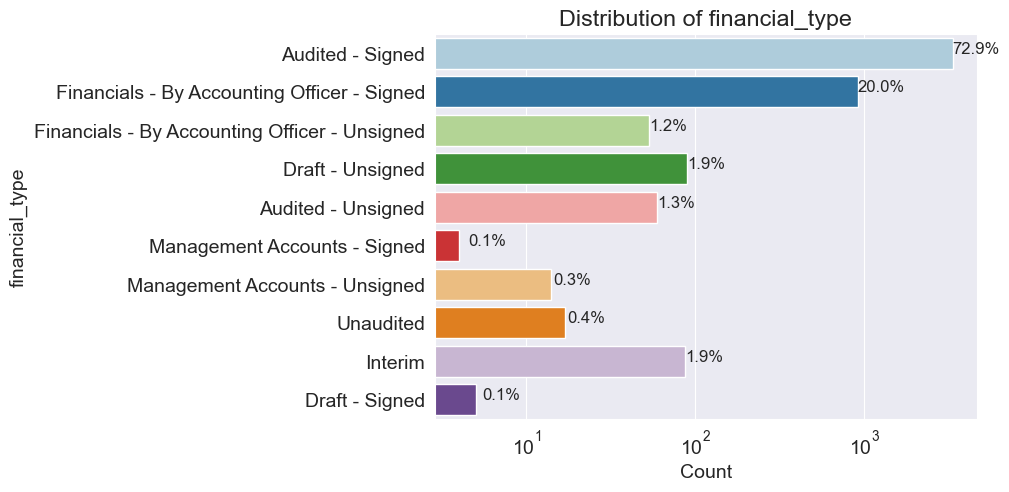

In [66]:
# Ploting for finacial data type
plot(cat,'financial_type')

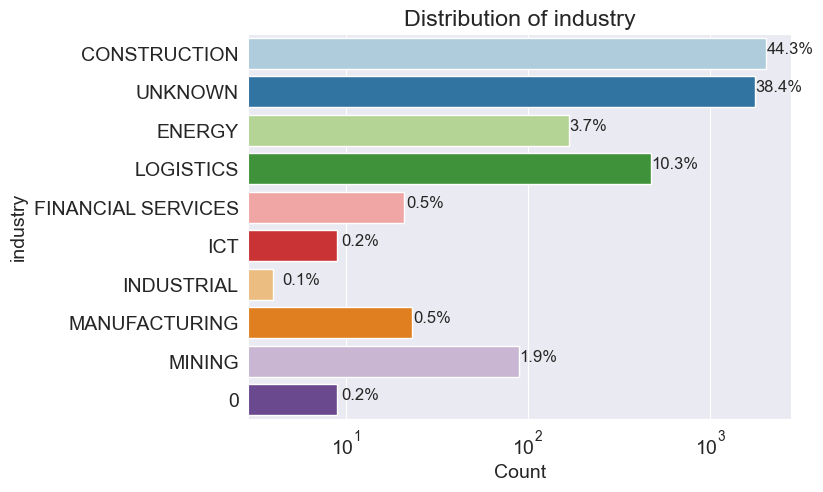

In [67]:
# Ploting for Industry data type
plot(cat,'industry')

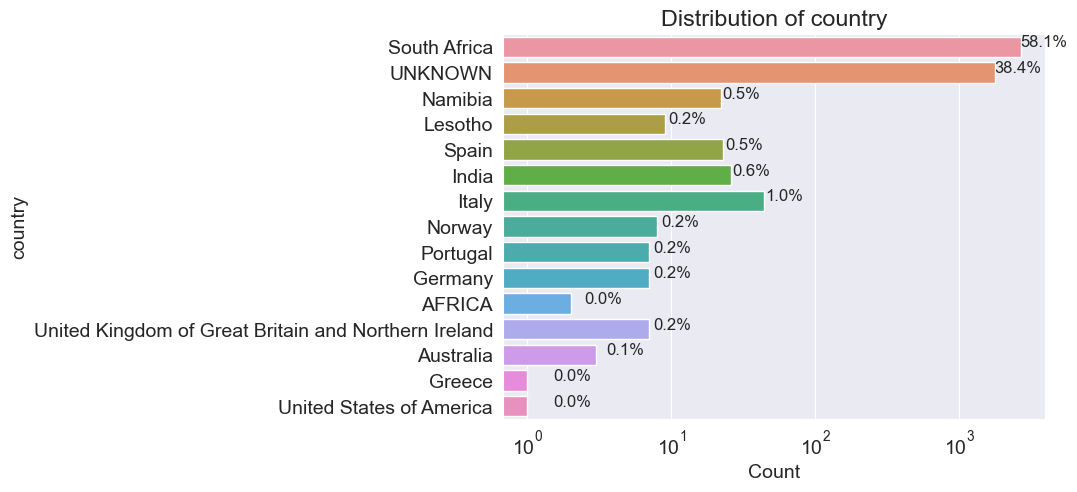

In [68]:
# Ploting for Industry data type
plot(cat,'country')

In [20]:
pip install --upgrade

Note: you may need to restart the kernel to use updated packages.


ERROR: You must give at least one requirement to install (see "pip help install")

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
import plotly.express as px
import pandas as pd
import kaleido

# create count plot
category_counts = df['country'].value_counts()
sorted_category_counts = category_counts.sort_values(ascending=False)
sorted_categories = sorted_category_counts.index.tolist()
fig = px.histogram(df, y="country",title="Countplot of tips by day and sex",
                   category_orders={"country": sorted_categories},log_x=True)
import plotly.graph_objects as go

fig.show()

fig.write_image('fig.png')

ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


In [14]:
import plotly.graph_objects as go

fig = go.Figure()
fig.write_image('aaa.png')


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


<a id="four"></a>
## 4. Feature Engineering
<a href=#contents>Back to Table of Contents</a>

<a id="five"></a>
## 5. Modeling
<a href=#contents>Back to Table of Contents</a>

<a id="six"></a>
## 6. Model Performance
<a href=#contents>Back to Table of Contents</a>

<a id="seven"></a>
## 7. Model Explanation
<a href=#contents>Back to Table of Contents</a>

<a id="eight"></a>
## 8. Conclusion
<a href=#contents>Back to Table of Contents</a>

<a id="nine"></a>
## 9. References
<a href=#contents>Back to Table of Contents</a>